<a href="https://colab.research.google.com/github/Taejin1221/Lab_Experiment/blob/main/GAN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules

In [ ]:
import glob, time, cv2, os
import numpy as np
from IPython import display
import matplotlib.pyplot as plt

In [ ]:
CURR_DIR = '/content'

X_DATA_DIR =  'train_x_data'
Y_DATA_DIR = 'train_y_data'
TEST_DIR = 'test_data'

DRIVE_DIR = 'drive/MyDrive'
RESULT_DIR = 'Results'

In [ ]:
IMG_SIZE = 256

# Make Data

In [ ]:
x_data = np.linspace( -10, 10, 50 )

y_data1 = x_data
y_data2 = x_data ** 2
y_data3 = x_data ** 3 

Y_data = [ y_data1, y_data2, y_data3 ]

In [ ]:
file_list = os.listdir(  )

if ( X_DATA_DIR not in file_list ):
    os.mkdir( X_DATA_DIR )

if ( Y_DATA_DIR not in file_list ):
    os.mkdir( Y_DATA_DIR )

if ( TEST_DIR not in file_list ):
    os.mkdir( TEST_DIR )

In [ ]:
X_DATA_DIR = os.path.join( CURR_DIR, X_DATA_DIR )
Y_DATA_DIR = os.path.join( CURR_DIR, Y_DATA_DIR )
TEST_DIR = os.path.join( CURR_DIR, TEST_DIR )

In [ ]:
n = len( Y_data ) * 10

figSize = ( IMG_SIZE / 100, IMG_SIZE / 100 )

os.chdir( X_DATA_DIR )
for i in range( n ):
    plt.figure( figsize = figSize, dpi = 100 )

    plt.plot( x_data, Y_data[i // 10], 'k.' )
    plt.axis( [ -10, 10, -50, 50 ] )
    plt.axis( 'off' )

    fileName = '0' + str( i ) if i < 10 else i
    plt.savefig( f'graph_x_{ fileName }.png'  )
    plt.clf()
    plt.close()

os.chdir( Y_DATA_DIR )
for i in range( n ):
    plt.figure( figsize = figSize, dpi = 100 )

    plt.plot( x_data, Y_data[i // 10], 'k-' )
    plt.axis( [ -10, 10, -50, 50 ] )
    plt.axis( 'off' )

    fileName = '0' + str( i ) if i < 10 else i
    plt.savefig( f'graph_y_{ fileName }.png'  )
    plt.clf()
    plt.close

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

In [ ]:
dataSize = len( x_data )
os.chdir( TEST_DIR )

plt.figure( figsize = figSize, dpi = 100 )

plt.plot( [ -2, 0, 2 ], [ -2, 0, 2 ], 'k.' )
plt.axis( [ -10, 10, -50, 50 ] )
plt.axis( 'off' )

plt.savefig( f'graph_test_0.png'  )
plt.clf()


plt.figure( figsize = figSize, dpi = 100 )

plt.plot( [ -2, 0, 2 ], [ 4, 0, 4 ], 'k.' )
plt.axis( 'off' )

plt.savefig( f'graph_test_1.png'  )
plt.clf()


plt.figure( figsize = figSize, dpi = 100 )

plt.plot( [ -2, 0, 2 ], [ -8, 0, 8 ], 'k.' )
plt.axis( 'off' )

plt.savefig( f'graph_test_2.png'  )
plt.clf()


<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

# Load Data

In [ ]:
x_data, y_data = [ ], [ ]
x_test = [ ]

os.chdir( X_DATA_DIR )
files = glob.glob( '*png' )
for file in files:
    x_data.append( 255 - cv2.imread( file, 0 ) )

os.chdir( Y_DATA_DIR )
files = glob.glob( '*png' )
for file in files:
    y_data.append( 255 - cv2.imread( file, 0 ) )

os.chdir( TEST_DIR )
files = glob.glob( '*png' )
for file in files:
    x_test.append( 255 - cv2.imread( file, 0 ) )

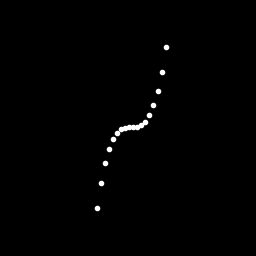

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow( x_data[0] )

In [ ]:
x_data = np.array( x_data ).astype( 'float32' )
y_data = np.array( y_data ).astype( 'float32' )
x_test = np.array( x_test ).astype( 'float32' )

x_data = ( x_data - 127.5 ) / 127.5
y_data = ( y_data - 127.5 ) / 127.5
x_test = ( x_test - 127.5 ) / 127.5

x_data = np.reshape( x_data, ( len( x_data ), IMG_SIZE, IMG_SIZE, 1 ) )
y_data = np.reshape( y_data, ( len( y_data ), IMG_SIZE, IMG_SIZE, 1 ) )
x_test = np.reshape( x_test, ( len( x_test ), IMG_SIZE, IMG_SIZE, 1 ) )

In [ ]:
x_data.shape

(30, 256, 256, 1)

# Build Models

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
BUFFER_SIZE = 30
BATCH_SIZE = 10
train_dataset = tf.data.Dataset.from_tensor_slices(x_data).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

## Build Generator Model

In [ ]:
generator = keras.Sequential( name = 'generator' )

generator.add( layers.Input( [ IMG_SIZE, IMG_SIZE, 1 ] ) )

# output shape ( 128, 128, 32 )
generator.add( layers.Conv2DTranspose( 32, ( 5, 5 ), padding = 'same', use_bias = False ) )
generator.add( layers.BatchNormalization( ) )
generator.add( layers.LeakyReLU( ) )

# output shape ( 64, 64, 64 )
generator.add( layers.Conv2DTranspose( 64, ( 5, 5 ), padding = 'same', use_bias = False ) )
generator.add( layers.BatchNormalization( ) )
generator.add( layers.LeakyReLU( ) )

 # output shape ( 128, 128, 64 )
generator.add( layers.Conv2DTranspose( 128, ( 5, 5 ), padding = 'same', use_bias = False ) )
generator.add( layers.BatchNormalization( ) )
generator.add( layers.LeakyReLU( ) )

# output shape ( 256, 256, 32 )
generator.add( layers.Conv2DTranspose( 256, ( 5, 5 ), padding = 'same', use_bias = False ) )
generator.add( layers.BatchNormalization( ) )
generator.add( layers.LeakyReLU( ) )

# output shape ( 256, 256, 1 )
generator.add( layers.Conv2DTranspose( 1, ( 5, 5 ), padding = 'same', use_bias = False, activation = 'tanh' ) )

In [ ]:
# generator.compile( )
# generator.summary()

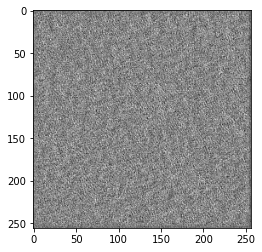

In [ ]:
noise = tf.random.normal( [ 1, IMG_SIZE, IMG_SIZE, 1 ] )
generated_image = generator( noise, training = False )

plt.imshow( generated_image[ 0, :, :, 0 ], cmap = 'gray' )

In [ ]:
generated_image.shape

TensorShape([1, 256, 256, 1])

## Build Discriminator Model

In [ ]:
discriminator = keras.Sequential( name = 'discriminator' )

discriminator.add( layers.Conv2D( 32, ( 5, 5 ), strides = ( 2, 2 ), padding = 'same',
                                 input_shape = [ IMG_SIZE, IMG_SIZE, 1 ] ) )
discriminator.add( layers.LeakyReLU( ) )
discriminator.add( layers.Dropout( 0.3 ) )

discriminator.add( layers.Conv2D( 64, ( 5, 5 ), strides = ( 2, 2 ), padding = 'same' ) )
discriminator.add( layers.LeakyReLU( ) )
discriminator.add( layers.Dropout( 0.3 ) )

discriminator.add( layers.Conv2D( 128, ( 5, 5 ), strides = ( 2, 2 ), padding = 'same' ) )
discriminator.add( layers.LeakyReLU( ) )
discriminator.add( layers.Dropout( 0.3 ) )

discriminator.add( layers.Flatten( ) )
discriminator.add( layers.Dense( 1 ) )

In [ ]:
decision = discriminator( generated_image )
print( decision )

tf.Tensor([[0.00161264]], shape=(1, 1), dtype=float32)


# Train the models

## Define loss and optimizers

In [ ]:
cross_entropy = keras.losses.BinaryCrossentropy( from_logits = True )

In [ ]:
def discriminator_loss( real_output, fake_output ):
    real_loss = cross_entropy( tf.ones_like( real_output ), real_output )
    fake_loss = cross_entropy( tf.zeros_like( fake_output ), fake_output )

    total_loss = real_loss + fake_loss
    
    return total_loss

def generator_loss( fake_output ):
    return cross_entropy( tf.ones_like( fake_output ), fake_output )

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam( 1e-4 )
discriminator_optimizer = tf.keras.optimizers.Adam( 1e-4 )

## Define Hyperparameter

In [ ]:
EPOCHS = 1000
noise_dim = 100
num_examples_to_generate = 16

## Define Train Function

In [ ]:
def generate_and_save_images( epochs ):
    predictions = generator( x_test, training = False )

    fig, ax = plt.subplots( 1, 3, figsize = ( 16, 12 ) )
    for i in range( predictions.shape[0] ):
        ax[i].imshow( tf.reshape( predictions[i], ( IMG_SIZE, IMG_SIZE ) ) )

    plt.savefig( 'Result_at_epoch_{:04d}.png'.format( epochs ) )
    plt.show()

In [ ]:
@tf.function
def train_step( images ):
    noise = tf.random.normal( [ BATCH_SIZE, IMG_SIZE, IMG_SIZE, 1 ] )

    with tf.GradientTape( ) as gen_tape, tf.GradientTape( ) as disc_tape:
      generated_images = generator( noise, training = True )

      real_output = discriminator( images, training = True )
      fake_output = discriminator( generated_images, training = True )

      gen_loss = generator_loss( fake_output )
      disc_loss = discriminator_loss( real_output, fake_output )

    gradients_of_generator = gen_tape.gradient( gen_loss, generator.trainable_variables )
    gradients_of_discriminator = disc_tape.gradient( disc_loss, discriminator.trainable_variables )

    generator_optimizer.apply_gradients( zip( gradients_of_generator, generator.trainable_variables ) )
    discriminator_optimizer.apply_gradients( zip( gradients_of_discriminator, discriminator.trainable_variables ) )

def train( dataset, epochs ):
    plt.gray()
    os.chdir( os.path.join( CURR_DIR, DRIVE_DIR ) )
    if ( RESULT_DIR not in os.listdir() ):
        os.mkdir( RESULT_DIR )
    os.chdir( RESULT_DIR )

    for epoch in range( epochs ):
        start = time.time( )

        for image_batch in dataset:
            train_step( image_batch )

        if ( epoch % 50 == 0 ):
            display.clear_output(wait=True)
            generate_and_save_images( epoch )

        print( 'Time for epoch {:02d} is {:.4f} sec'.format( epoch + 1, time.time( ) - start ) )

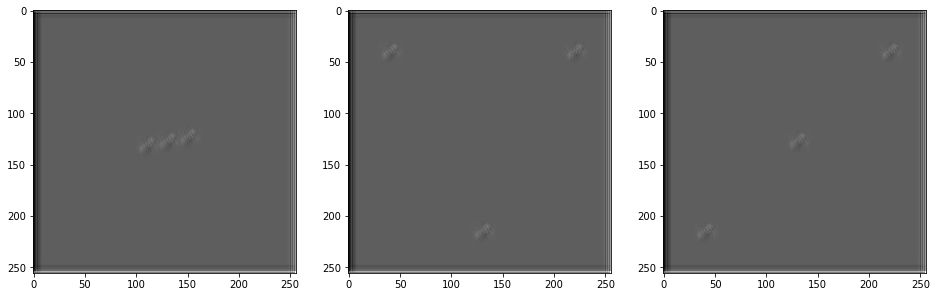

Time for epoch 951 is 3.03456449508667 sec
Time for epoch 952 is 1.314375877380371 sec
Time for epoch 953 is 1.9317889213562012 sec
Time for epoch 954 is 1.9244871139526367 sec
Time for epoch 955 is 1.9217636585235596 sec
Time for epoch 956 is 1.9256038665771484 sec
Time for epoch 957 is 1.9272372722625732 sec
Time for epoch 958 is 1.9260239601135254 sec
Time for epoch 959 is 1.9298062324523926 sec
Time for epoch 960 is 1.923827886581421 sec
Time for epoch 961 is 1.923572063446045 sec
Time for epoch 962 is 1.9215717315673828 sec
Time for epoch 963 is 1.9282844066619873 sec
Time for epoch 964 is 1.9200797080993652 sec
Time for epoch 965 is 1.922327995300293 sec
Time for epoch 966 is 1.924417495727539 sec
Time for epoch 967 is 1.922806978225708 sec
Time for epoch 968 is 1.9254229068756104 sec
Time for epoch 969 is 1.9178135395050049 sec
Time for epoch 970 is 1.918851375579834 sec
Time for epoch 971 is 1.9177627563476562 sec
Time for epoch 972 is 1.9205267429351807 sec
Time for epoch 973 

In [ ]:
train( train_dataset, EPOCHS )

# Test Model

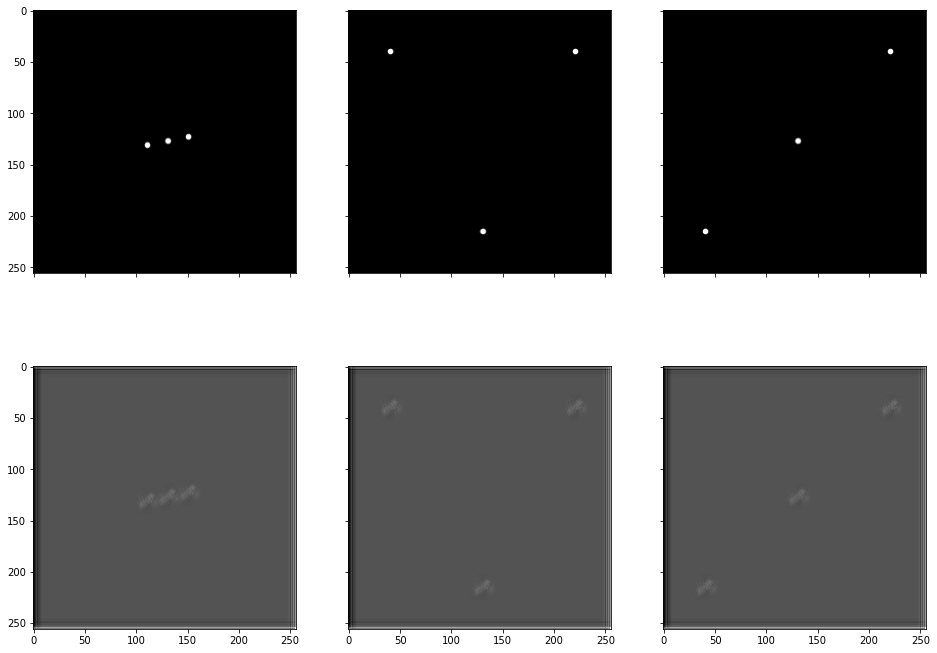

In [ ]:
predicted_images = generator( x_test )

fig, ax = plt.subplots( 2, 3, True, True, figsize = ( 16, 12 ) )
for i in range( len( x_test ) ):
    ax[0][i].imshow( x_test[i].reshape( 256, 256 ) )

    ax[1][i].imshow( tf.reshape( predicted_images[i], ( 256, 256 ) ) )
plt.savefig( 'Result_Final.png' )